In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pymongo.errors import PyMongoError

In [ ]:
try:
    client = MongoClient("mongodb://localhost:27017/")
    print("Connected to MongoDB server")
except pymongo.errors.ConnectionFailure as e:
    print(f"Could not connect to MongoDB: {e}")
    exit()


try:
    db = client["practice"]
    print("Connected to database:", db.name)
except Exception as e:
    print(f"Database error: {e}")
    exit()

Connected to MongoDB server
Connected to database: practice


In [61]:
print("Collections:", db.list_collection_names())

Collections: ['real_state', 'movies', 'employees']


In [62]:
real_state = db["real_state"]

In [63]:
list_of_data = real_state.find()
list_data = pd.DataFrame(list_of_data)
list_data 

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b491,P001,"123 Maple Ave, Springfield, IL",250000,3,2.0,1800,House,1995,"[Garage, Backyard, Central AC]",Sarah Jones,Available
1,696bc5c5d1b57fd7f4c1b492,P002,"456 Oak St, Springfield, IL",180000,2,1.0,950,Condo,2005,"[Gym, Pool, Elevator]",Mike Brown,Sold
2,696bc5c5d1b57fd7f4c1b493,P003,"789 Pine Ln, Springfield, IL",450000,4,3.0,2800,House,2018,"[Garage, Pool, Smart Home, Fireplace]",Sarah Jones,Available
3,696bc5c5d1b57fd7f4c1b494,P004,"101 Elm St, Springfield, IL",120000,1,1.0,700,Apartment,1980,[Shared Laundry],Emily Davis,Available
4,696bc5c5d1b57fd7f4c1b495,P005,"202 Birch Blvd, Springfield, IL",320000,3,2.5,2100,Townhouse,2010,"[Garage, Patio, Hardwood Floors]",Mike Brown,Pending
5,696bc5c5d1b57fd7f4c1b496,P006,"303 Cedar Dr, Springfield, IL",550000,5,4.0,3500,House,2022,"[Garage, Pool, Home Theater, Wine Cellar, Sola...",Sarah Jones,Available
6,696bc5c5d1b57fd7f4c1b497,P007,"404 Walnut Ct, Springfield, IL",195000,2,2.0,1100,Condo,2000,"[Gym, Parking Spot]",Emily Davis,Sold
7,696bc5c5d1b57fd7f4c1b498,P008,"505 Ash Way, Springfield, IL",275000,3,2.0,1600,House,1960,"[Backyard, Basement]",David Wilson,Available
8,696bc5c5d1b57fd7f4c1b499,P009,"606 Cherry St, Springfield, IL",150000,2,1.0,900,Apartment,1990,[Balcony],David Wilson,Available
9,696bc5c5d1b57fd7f4c1b49a,P010,"707 Spruce Ave, Springfield, IL",380000,4,2.5,2400,House,2015,"[Garage, Fenced Yard, Granite Countertops]",Mike Brown,Available


In [65]:
less_than_200k =  real_state.find({'price':{"$lt":200000}})
property_less_200k = pd.DataFrame(less_than_200k)
property_less_200k

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b492,P002,"456 Oak St, Springfield, IL",180000,2,1.0,950,Condo,2005,"[Gym, Pool, Elevator]",Mike Brown,Sold
1,696bc5c5d1b57fd7f4c1b494,P004,"101 Elm St, Springfield, IL",120000,1,1.0,700,Apartment,1980,[Shared Laundry],Emily Davis,Available
2,696bc5c5d1b57fd7f4c1b497,P007,"404 Walnut Ct, Springfield, IL",195000,2,2.0,1100,Condo,2000,"[Gym, Parking Spot]",Emily Davis,Sold
3,696bc5c5d1b57fd7f4c1b499,P009,"606 Cherry St, Springfield, IL",150000,2,1.0,900,Apartment,1990,[Balcony],David Wilson,Available
4,696bc5c5d1b57fd7f4c1b49d,P013,"111 Magnolia Cir, Springfield, IL",175000,2,1.5,1000,Condo,1998,"[Parking Spot, Gym]",David Wilson,Sold
5,696bc5c5d1b57fd7f4c1b49f,P015,"333 Redwood Ln, Springfield, IL",135000,1,1.0,800,Apartment,2012,"[Rooftop Access, Concierge]",Sarah Jones,Available


In [66]:
property_listed_by_mike = real_state.find({"agent":"Mike Brown"})
mike_lister = pd.DataFrame(property_listed_by_mike)
mike_lister

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b492,P002,"456 Oak St, Springfield, IL",180000,2,1.0,950,Condo,2005,"[Gym, Pool, Elevator]",Mike Brown,Sold
1,696bc5c5d1b57fd7f4c1b495,P005,"202 Birch Blvd, Springfield, IL",320000,3,2.5,2100,Townhouse,2010,"[Garage, Patio, Hardwood Floors]",Mike Brown,Pending
2,696bc5c5d1b57fd7f4c1b49a,P010,"707 Spruce Ave, Springfield, IL",380000,4,2.5,2400,House,2015,"[Garage, Fenced Yard, Granite Countertops]",Mike Brown,Available
3,696bc5c5d1b57fd7f4c1b49e,P014,"222 Cypress Dr, Springfield, IL",290000,3,2.0,1750,House,1975,"[Backyard, Fireplace, Renovated Kitchen]",Mike Brown,Available


In [67]:
try:
    house_and_3bedrooms = real_state.find({"type":"House","bedrooms":3})
    print('connected')
except PyMongoError as e:
    print('not working')
    
house_and_3bedrooms = pd.DataFrame(house_and_3bedrooms)
house_and_3bedrooms

connected


,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b491,P001,"123 Maple Ave, Springfield, IL",250000,3,2,1800,House,1995,"[Garage, Backyard, Central AC]",Sarah Jones,Available
1,696bc5c5d1b57fd7f4c1b498,P008,"505 Ash Way, Springfield, IL",275000,3,2,1600,House,1960,"[Backyard, Basement]",David Wilson,Available
2,696bc5c5d1b57fd7f4c1b49e,P014,"222 Cypress Dr, Springfield, IL",290000,3,2,1750,House,1975,"[Backyard, Fireplace, Renovated Kitchen]",Mike Brown,Available


In [68]:
try:
    between_2000_and_2015 = real_state.find({"year_built": {"$gt": 2000, "$lt":2015}})
    print('connected')
except PyMongoError as e:
    print(f"MongoDB Error: {e}")


between_2000_and_2015 = pd.DataFrame(between_2000_and_2015)
between_2000_and_2015.sort_values(by='price', ascending=False)




connected


,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
1,696bc5c5d1b57fd7f4c1b495,P005,"202 Birch Blvd, Springfield, IL",320000,3,2.5,2100,Townhouse,2010,"[Garage, Patio, Hardwood Floors]",Mike Brown,Pending
2,696bc5c5d1b57fd7f4c1b49b,P011,"808 Willow Rd, Springfield, IL",210000,2,2.0,1300,Townhouse,2008,"[Garage, Community Pool]",Sarah Jones,Pending
0,696bc5c5d1b57fd7f4c1b492,P002,"456 Oak St, Springfield, IL",180000,2,1.0,950,Condo,2005,"[Gym, Pool, Elevator]",Mike Brown,Sold
3,696bc5c5d1b57fd7f4c1b49f,P015,"333 Redwood Ln, Springfield, IL",135000,1,1.0,800,Apartment,2012,"[Rooftop Access, Concierge]",Sarah Jones,Available


In [69]:
find_pool_and_gym = real_state.find({"amenities": {"$in": ["Pool", "Gym"]}})
find_pool_and_gym = pd.DataFrame(find_pool_and_gym)
find_pool_and_gym      

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b492,P002,"456 Oak St, Springfield, IL",180000,2,1.0,950,Condo,2005,"[Gym, Pool, Elevator]",Mike Brown,Sold
1,696bc5c5d1b57fd7f4c1b493,P003,"789 Pine Ln, Springfield, IL",450000,4,3.0,2800,House,2018,"[Garage, Pool, Smart Home, Fireplace]",Sarah Jones,Available
2,696bc5c5d1b57fd7f4c1b496,P006,"303 Cedar Dr, Springfield, IL",550000,5,4.0,3500,House,2022,"[Garage, Pool, Home Theater, Wine Cellar, Sola...",Sarah Jones,Available
3,696bc5c5d1b57fd7f4c1b497,P007,"404 Walnut Ct, Springfield, IL",195000,2,2.0,1100,Condo,2000,"[Gym, Parking Spot]",Emily Davis,Sold
4,696bc5c5d1b57fd7f4c1b49c,P012,"909 Poplar Pl, Springfield, IL",600000,6,5.0,4200,House,2020,"[Garage, Pool, Guest House, Lake View]",Emily Davis,Available
5,696bc5c5d1b57fd7f4c1b49d,P013,"111 Magnolia Cir, Springfield, IL",175000,2,1.5,1000,Condo,1998,"[Parking Spot, Gym]",David Wilson,Sold


In [70]:
sorted_by_price = real_state.find({})

sort_price = pd.DataFrame(sorted_by_price).sort_values(by='price',ascending=False)
sort_price

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
11,696bc5c5d1b57fd7f4c1b49c,P012,"909 Poplar Pl, Springfield, IL",600000,6,5.0,4200,House,2020,"[Garage, Pool, Guest House, Lake View]",Emily Davis,Available
5,696bc5c5d1b57fd7f4c1b496,P006,"303 Cedar Dr, Springfield, IL",550000,5,4.0,3500,House,2022,"[Garage, Pool, Home Theater, Wine Cellar, Sola...",Sarah Jones,Available
2,696bc5c5d1b57fd7f4c1b493,P003,"789 Pine Ln, Springfield, IL",450000,4,3.0,2800,House,2018,"[Garage, Pool, Smart Home, Fireplace]",Sarah Jones,Available
9,696bc5c5d1b57fd7f4c1b49a,P010,"707 Spruce Ave, Springfield, IL",380000,4,2.5,2400,House,2015,"[Garage, Fenced Yard, Granite Countertops]",Mike Brown,Available
4,696bc5c5d1b57fd7f4c1b495,P005,"202 Birch Blvd, Springfield, IL",320000,3,2.5,2100,Townhouse,2010,"[Garage, Patio, Hardwood Floors]",Mike Brown,Pending
13,696bc5c5d1b57fd7f4c1b49e,P014,"222 Cypress Dr, Springfield, IL",290000,3,2.0,1750,House,1975,"[Backyard, Fireplace, Renovated Kitchen]",Mike Brown,Available
7,696bc5c5d1b57fd7f4c1b498,P008,"505 Ash Way, Springfield, IL",275000,3,2.0,1600,House,1960,"[Backyard, Basement]",David Wilson,Available
0,696bc5c5d1b57fd7f4c1b491,P001,"123 Maple Ave, Springfield, IL",250000,3,2.0,1800,House,1995,"[Garage, Backyard, Central AC]",Sarah Jones,Available
10,696bc5c5d1b57fd7f4c1b49b,P011,"808 Willow Rd, Springfield, IL",210000,2,2.0,1300,Townhouse,2008,"[Garage, Community Pool]",Sarah Jones,Pending
6,696bc5c5d1b57fd7f4c1b497,P007,"404 Walnut Ct, Springfield, IL",195000,2,2.0,1100,Condo,2000,"[Gym, Parking Spot]",Emily Davis,Sold


In [71]:
top_3 = sort_price.head(3)

top_3

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
11,696bc5c5d1b57fd7f4c1b49c,P012,"909 Poplar Pl, Springfield, IL",600000,6,5.0,4200,House,2020,"[Garage, Pool, Guest House, Lake View]",Emily Davis,Available
5,696bc5c5d1b57fd7f4c1b496,P006,"303 Cedar Dr, Springfield, IL",550000,5,4.0,3500,House,2022,"[Garage, Pool, Home Theater, Wine Cellar, Sola...",Sarah Jones,Available
2,696bc5c5d1b57fd7f4c1b493,P003,"789 Pine Ln, Springfield, IL",450000,4,3.0,2800,House,2018,"[Garage, Pool, Smart Home, Fireplace]",Sarah Jones,Available


In [72]:
oldest = real_state.find_one(sort=[("year_built", 1)]) 
oldest = pd.DataFrame(oldest)
oldest

,_id,property_id,address,price,bedrooms,bathrooms,square_feet,type,year_built,amenities,agent,status
0,696bc5c5d1b57fd7f4c1b498,P008,"505 Ash Way, Springfield, IL",275000,3,2,1600,House,1960,Backyard,David Wilson,Available
1,696bc5c5d1b57fd7f4c1b498,P008,"505 Ash Way, Springfield, IL",275000,3,2,1600,House,1960,Basement,David Wilson,Available


In [73]:
average_price = real_state.find({})

average_price = pd.DataFrame(average_price)

average_price = average_price['price'].mean()

average_price
print(f'the average price of all the properties was {average_price:.2f}')

the average price of all the properties was 285333.33


In [77]:
groupby_type =real_state.find({})
groupby_type = pd.DataFrame(groupby_type)
groupby_type = groupby_type.groupby('type').size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)
groupby_type

,type,count
2,House,7
0,Apartment,3
1,Condo,3
3,Townhouse,2


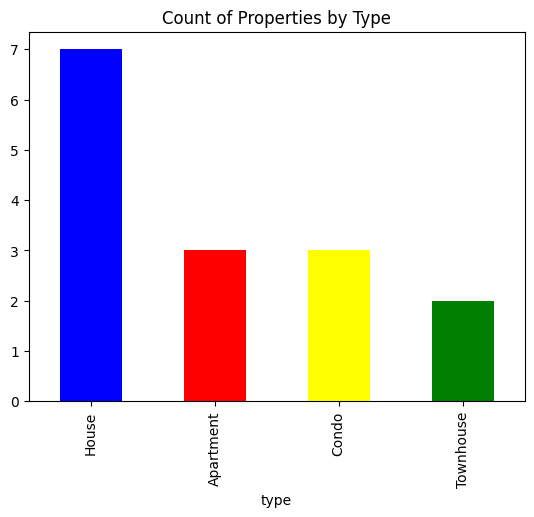

In [80]:
groupby_type.plot(kind='bar',x='type',y='count',title='Count of Properties by Type',color=['blue','red','yellow','green'])
plt.legend().set_visible(False)
plt.show()

In [86]:
real_state.update_one({'property_id':'P001' },{"$set":{'price':11000}})




UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)